In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### Importing the dataset from web.

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
# Creatting a new column which will state that how many total cases have been reported till now by sum of the three columns - 'Confirmed', 'Recovered','Deaths'.

df['Total Cases'] = df[['Confirmed', 'Recovered','Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [4]:
# Worlwide Cases
worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,555,28,17,600
2020-01-23,654,30,18,702
2020-01-24,941,36,26,1003
2020-01-25,1434,39,42,1515
2020-01-26,2118,52,56,2226


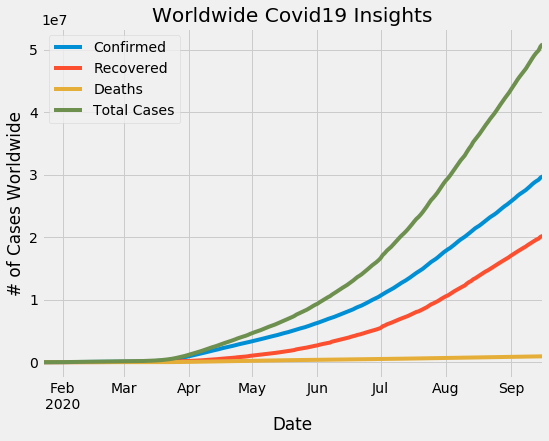

In [5]:
# Creating a Visualization

w = worldwide_df.plot(figsize=(8,6))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide Covid19 Insights')

plt.show()

In [6]:
# Creating a sub-data set for US country

us_df = df[df['Country']=='US'].groupby(['Date']).sum()
us_df.head()
us_df['Total Cases'] = us_df[['Confirmed', 'Recovered','Deaths']].sum(axis=1)
us_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,1,0,0,1
2020-01-23,1,0,0,1
2020-01-24,2,0,0,2
2020-01-25,2,0,0,2
2020-01-26,5,0,0,5


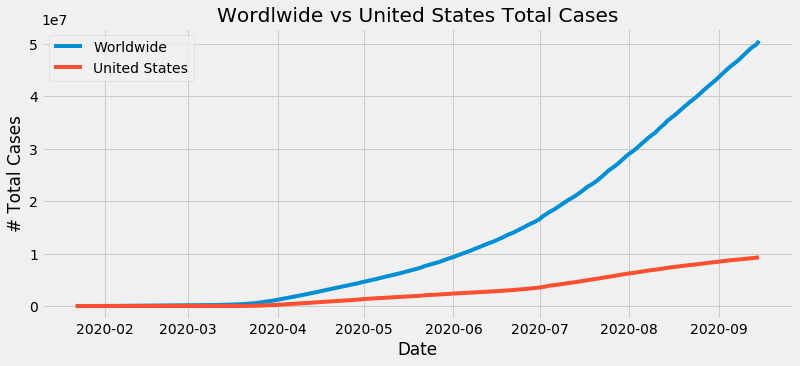

In [50]:

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(us_df[['Total Cases']], label='United States')
ax.set_xlabel('Date')
ax.set_ylabel('# Total Cases')
ax.title.set_text('Wordlwide vs United States Total Cases')

plt.legend(loc='upper left')
plt.show()

In [7]:
# Creating a sub-data set for India country

india_df = df[df['Country']=='India'].groupby(['Date']).sum()
india_df.head()
india_df['Total Cases'] = india_df[['Confirmed', 'Recovered','Deaths']].sum(axis=1)
india_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0


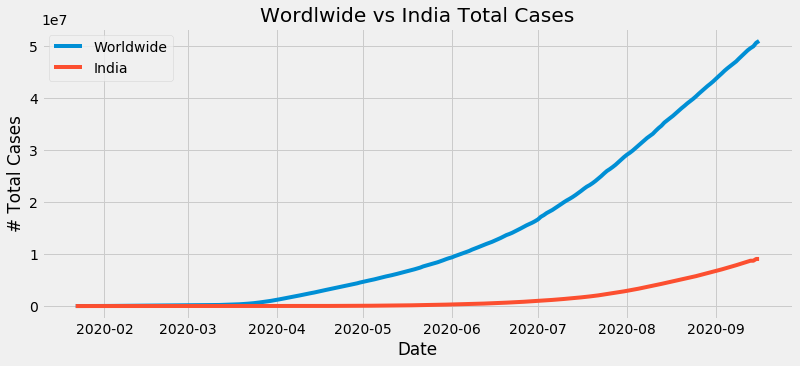

In [8]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(india_df[['Total Cases']], label='India')
ax.set_xlabel('Date')
ax.set_ylabel('# Total Cases')
ax.title.set_text('Wordlwide vs India Total Cases')

plt.legend(loc='upper left')
plt.show()

In [9]:
# United States Daily Cases and Deaths

#Daily Chnage in the cases reported

us_df = us_df.reset_index()
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [10]:
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed
0,2020-01-22,1,0,0,1,NaN
1,2020-01-23,1,0,0,1,0.0
2,2020-01-24,2,0,0,2,1.0
3,2020-01-25,2,0,0,2,0.0
4,2020-01-26,5,0,0,5,3.0
...,...,...,...,...,...,...
234,2020-09-12,6485123,2434658,193693,9113474,41471.0
235,2020-09-13,6520122,2451406,194071,9165599,34999.0
236,2020-09-14,6553652,2474570,194493,9222715,33530.0
237,2020-09-15,6593269,2495127,195786,9284182,39617.0


In [12]:
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())
us_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,2020-01-22,1,0,0,1,NaN,NaN
1,2020-01-23,1,0,0,1,0.0,0.0
2,2020-01-24,2,0,0,2,1.0,0.0
3,2020-01-25,2,0,0,2,0.0,0.0
4,2020-01-26,5,0,0,5,3.0,0.0
...,...,...,...,...,...,...,...
234,2020-09-12,6485123,2434658,193693,9113474,41471.0,714.0
235,2020-09-13,6520122,2451406,194071,9165599,34999.0,378.0
236,2020-09-14,6553652,2474570,194493,9222715,33530.0,422.0
237,2020-09-15,6593269,2495127,195786,9284182,39617.0,1293.0


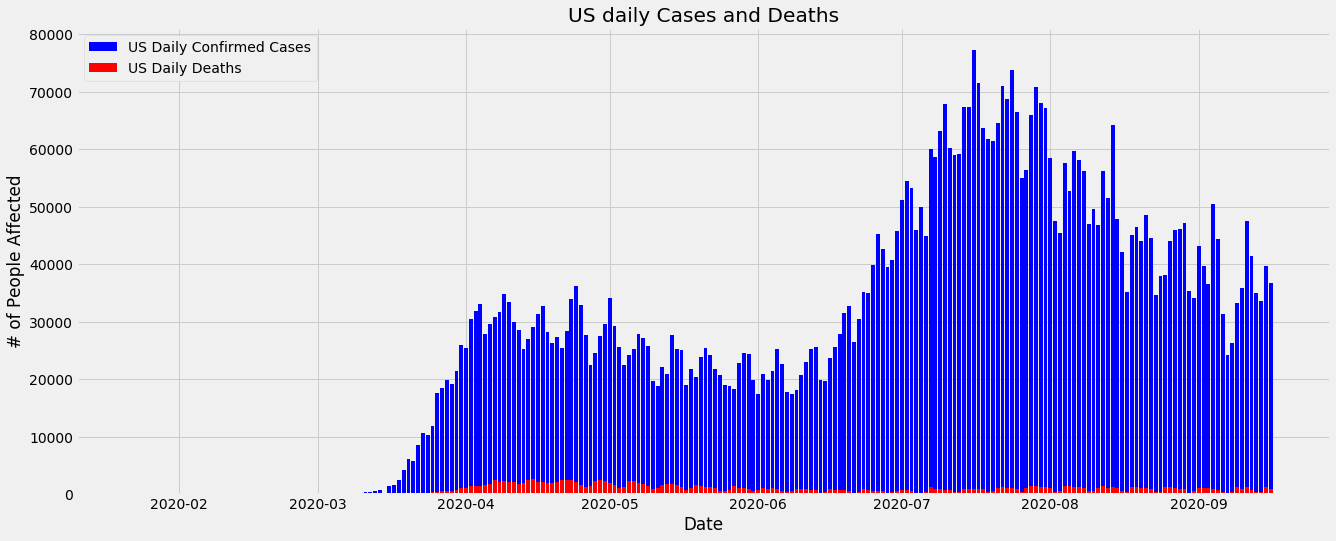

In [13]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color='b', label='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color='r', label='US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

### India Daily Cases and Deaths

### Daily Change in the cases reported

In [14]:
india_df = india_df.reset_index()
india_df.head()

,Date,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [20]:
india_df = india_df.reset_index()
india_df['Daily Confirmed'] = india_df['Confirmed'].sub(us_df['Confirmed'].shift())
india_df

,level_0,index,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,0,0,2020-01-22,0,0,0,0,NaN,NaN
1,1,1,2020-01-23,0,0,0,0,-1.0,0.0
2,2,2,2020-01-24,0,0,0,0,-1.0,0.0
3,3,3,2020-01-25,0,0,0,0,-2.0,0.0
4,4,4,2020-01-26,0,0,0,0,-2.0,0.0
...,...,...,...,...,...,...,...,...,...
234,234,234,2020-09-12,4754356,3702595,78586,8535537,-1689296.0,-114393.0
235,235,235,2020-09-13,4846427,3780107,79722,8706256,-1638696.0,-113971.0
236,236,236,2020-09-14,4846427,3780107,79722,8706256,-1673695.0,-114349.0
237,237,237,2020-09-15,5020359,3942360,82066,9044785,-1533293.0,-112427.0


In [22]:
india_df['Daily Deaths'] = india_df['Deaths'].sub(us_df['Deaths'].shift())
india_df

,level_0,index,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,0,0,2020-01-22,0,0,0,0,NaN,NaN
1,1,1,2020-01-23,0,0,0,0,-1.0,0.0
2,2,2,2020-01-24,0,0,0,0,-1.0,0.0
3,3,3,2020-01-25,0,0,0,0,-2.0,0.0
4,4,4,2020-01-26,0,0,0,0,-2.0,0.0
...,...,...,...,...,...,...,...,...,...
234,234,234,2020-09-12,4754356,3702595,78586,8535537,-1689296.0,-114393.0
235,235,235,2020-09-13,4846427,3780107,79722,8706256,-1638696.0,-113971.0
236,236,236,2020-09-14,4846427,3780107,79722,8706256,-1673695.0,-114349.0
237,237,237,2020-09-15,5020359,3942360,82066,9044785,-1533293.0,-112427.0


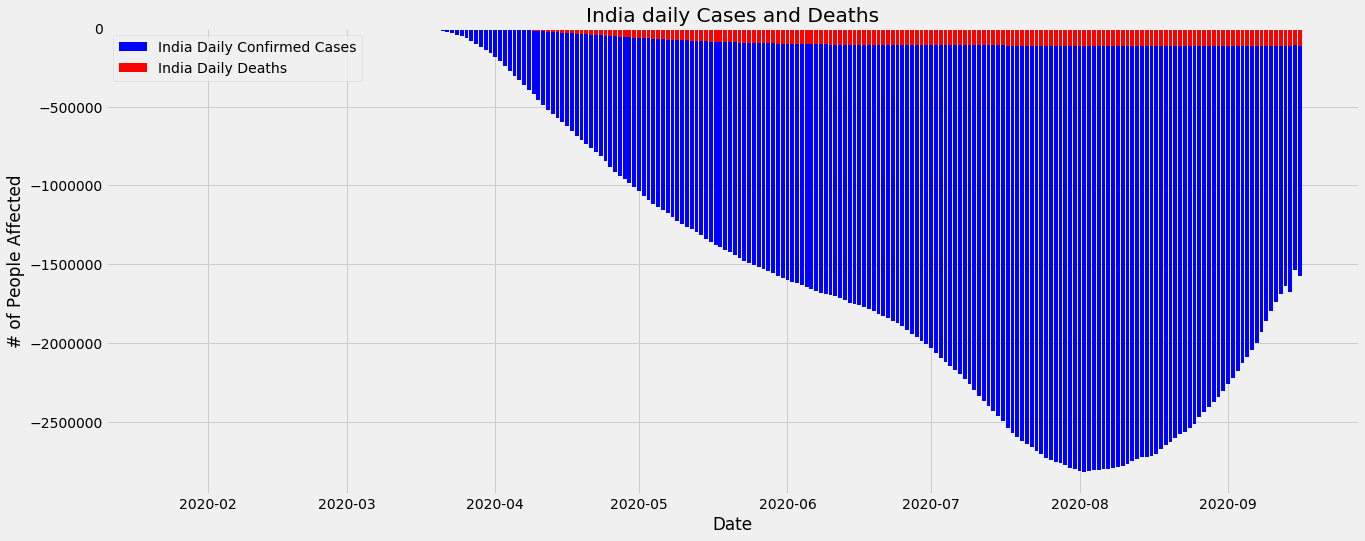

In [19]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(india_df['Date'], india_df['Daily Confirmed'], color='b', label='India Daily Confirmed Cases')
ax.bar(india_df['Date'], india_df['Daily Deaths'], color='r', label='India Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('India daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

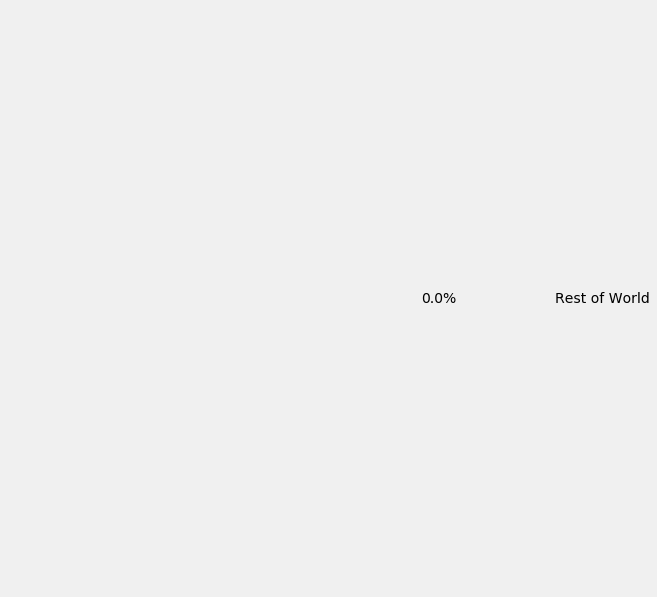

In [78]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')

plt.show()